<a href="https://colab.research.google.com/github/katherinetien/exploring-baltimore-housing-development/blob/main/exploring_baltimore_development_crisis_kathytien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploring Data Relevant to Housing and Community Development in Baltimore
*  Business question is to evaluate the resources available for 
low-income neighborhoods to foster economic growth 
*  Identify trends in vacant houses and population growth/decline in neighborhoods



In [ ]:
# for data analysis 
import pandas as pd
import numpy as np

# for data visualization 
import plotly.express as px 

# import datasets

In [ ]:
# import data 

# percentage of residential properties that are vacant and abandoned by neighborhood
df_vacant_props = pd.read_csv("https://raw.githubusercontent.com/katherinetien/exploring-baltimore-housing-development/main/abandoned_housing.csv")

In [ ]:
# preview imported data
df_vacant_props.head()

,Tract,Neighborhood,City,State,Percent Abandoned Houses
0,24510250101,Beechfield,Baltimore,MD,1.025499
1,24003750201,Brooklyn,Baltimore,MD,7.826087
2,24510250401,Brooklyn,Baltimore,MD,7.826087
3,24510250402,Brooklyn,Baltimore,MD,7.826087
4,24510250600,Brooklyn,Baltimore,MD,7.826087


In [ ]:
# import rest of data 

# population growth percentage from 2010-2018 by neighborhood
# positive value is growth, negative value is decline
df_pop_growth = pd.read_csv("https://raw.githubusercontent.com/katherinetien/exploring-baltimore-housing-development/main/population_growth.csv") 

In [ ]:
# preview imported data
df_pop_growth.head()

,Tract,Neighborhood,City,State,Population Growth
0,24510250101,Beechfield,Baltimore,MD,-0.013305
1,24003750201,Brooklyn,Baltimore,MD,0.094972
2,24510250401,Brooklyn,Baltimore,MD,0.094972
3,24510250402,Brooklyn,Baltimore,MD,0.094972
4,24510250600,Brooklyn,Baltimore,MD,0.094972


In [ ]:
df_pop_growth.describe()

,Tract,Population Growth
count,4.100000e+01,41.000000
mean,2.449783e+10,0.203573
std,7.909129e+07,0.457238
min,2.400375e+10,-0.103415
25%,2.451012e+10,-0.013305
50%,2.451021e+10,0.041591
75%,2.451025e+10,0.121103
max,2.451027e+10,1.396552


# merge data

In [ ]:
# merge datasets

df_vacant_props_pop_growth_merge = pd.merge(df_vacant_props, 
                                            df_pop_growth[["Neighborhood", "Population Growth"]], 
                                            how = "left", 
                                            on = "Neighborhood")

In [ ]:
# preview merged dataset 
df_vacant_props_pop_growth_merge.head()

,Tract,Neighborhood,City,State,Percent Abandoned Houses,Population Growth
0,24510250101,Beechfield,Baltimore,MD,1.025499,-0.013305
1,24003750201,Brooklyn,Baltimore,MD,7.826087,0.094972
2,24003750201,Brooklyn,Baltimore,MD,7.826087,0.094972
3,24003750201,Brooklyn,Baltimore,MD,7.826087,0.094972
4,24003750201,Brooklyn,Baltimore,MD,7.826087,0.094972


In [ ]:
# data visualization with plotly express 
from plotly.subplots import make_subplots
import plotly.figure_factory as ff 

In [ ]:
# preview merged dataset to use for line graph 
df_vacant_props_pop_growth_merge.head(5)

,Tract,Neighborhood,City,State,Percent Abandoned Houses,Population Growth
0,24510250101,Beechfield,Baltimore,MD,1.025499,-0.013305
1,24003750201,Brooklyn,Baltimore,MD,7.826087,0.094972
17,24510010400,Canton,Baltimore,MD,0.470530,0.121103
33,24510272004,Cheswolde,Baltimore,MD,0.102705,0.131686
34,24510250500,Curtis Bay,Baltimore,MD,7.826087,0.020342


In [ ]:
# drop duplicates
df_vacant_props_pop_growth_merge = df_vacant_props_pop_growth_merge.drop_duplicates(subset = "Neighborhood", keep = "first")

In [ ]:
# preview merged dataset without duplicated data 
df_vacant_props_pop_growth_merge.head(25)

,Tract,Neighborhood,City,State,Percent Abandoned Houses,Population Growth
0,24510250101,Beechfield,Baltimore,MD,1.025499,-0.013305
1,24003750201,Brooklyn,Baltimore,MD,7.826087,0.094972
17,24510010400,Canton,Baltimore,MD,0.470530,0.121103
33,24510272004,Cheswolde,Baltimore,MD,0.102705,0.131686
34,24510250500,Curtis Bay,Baltimore,MD,7.826087,0.020342
35,24510040100,Downtown,Baltimore,MD,11.190818,1.396552
60,24510020300,Fells Point,Baltimore,MD,1.031175,0.255843
61,24510260102,Frankford,Baltimore,MD,1.207883,0.053716
65,24510130700,Hampden,Baltimore,MD,0.815494,-0.066872
74,24510180300,Hollins Market,Baltimore,MD,13.543192,-0.103415


# scatter plot comparing % vacant resident properties and population growth

In [ ]:
# make a scatter plot 
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/katherinetien/exploring-baltimore-housing-development/main/raw_merged_data.csv")

In [ ]:
df.head()

,Tract,Neighborhood,City,State,Percent Abandoned Houses,Population Growth
0,24510250101,Beechfield,Baltimore,MD,1.025499,-0.013305
1,24003750201,Brooklyn,Baltimore,MD,7.826087,0.094972
2,24510010400,Canton,Baltimore,MD,0.470530,0.121103
3,24510272004,Cheswolde,Baltimore,MD,0.102705,0.131686
4,24510250500,Curtis Bay,Baltimore,MD,7.826087,0.020342


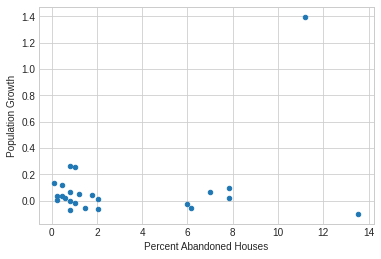

In [ ]:
df.plot.scatter(x="Percent Abandoned Houses", y= "Population Growth")

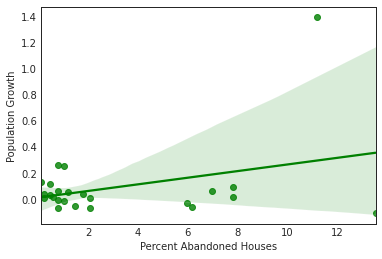

In [ ]:
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.regplot(x="Percent Abandoned Houses", y= "Population Growth", color = "g", data = df)